In [1]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Substitua 'seu_arquivo.xlsx' pelo nome do seu arquivo e 'Sheet1' pelo nome da sua planilha
df = pd.read_excel('qtd e valor de multa.xlsx', sheet_name='Planilha1')

In [9]:
# Convertendo a coluna de dados para um array NumPy (ajuste o nome da coluna se necessário)
dados = df['VALOR'].values

# Calculando as estatísticas
media = np.mean(dados)
desvio_padrao = np.std(dados)
n = len(dados)


resultados_anderson = stats.anderson(dados)  # Armazena todos os resultados

# Acessando os valores desejados (ajuste os índices conforme a documentação)
ad = resultados_anderson[0]
p_valor = resultados_anderson[1]


minimo = np.min(dados)
maximo = np.max(dados)
q1 = np.percentile(dados, 25)
mediana = np.median(dados)
q3 = np.percentile(dados, 75)
amplitude = maximo - minimo

# Imprimindo os resultados
print('Média:', media)
print('Desvio Padrão:', desvio_padrao)
print('Tamanho da amostra (N):', n)
print('Teste de Anderson-Darling:', ad)
print('Valor-p:', p_valor)
print('Mínimo:', minimo)
print('Máximo:', maximo)
print('Q1:', q1)
print('Mediana:', mediana)
print('Q3:', q3)
print('Amplitude:', amplitude)

Média: 2187.5
Desvio Padrão: 431.50656619183286
Tamanho da amostra (N): 12
Teste de Anderson-Darling: 0.1530235288530406
Valor-p: [0.497 0.566 0.679 0.792 0.942]
Mínimo: 1500
Máximo: 2875
Q1: 1843.75
Mediana: 2187.5
Q3: 2531.25
Amplitude: 1375


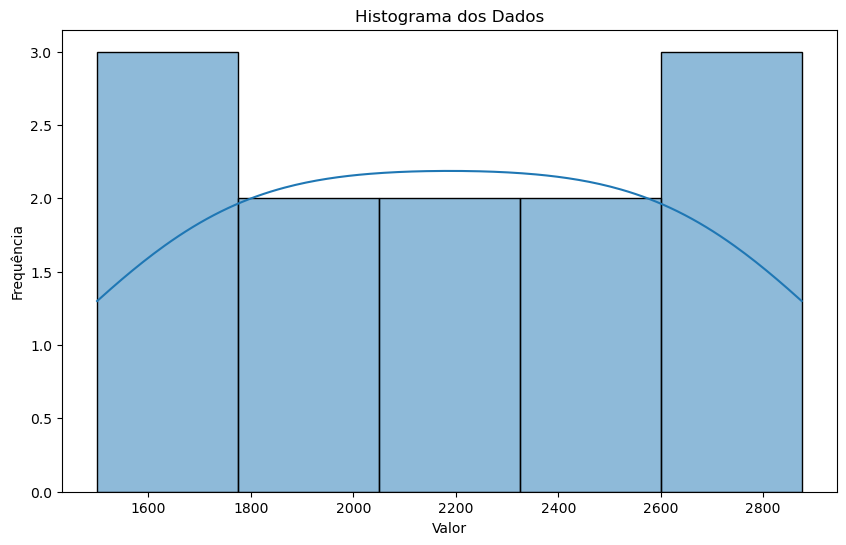

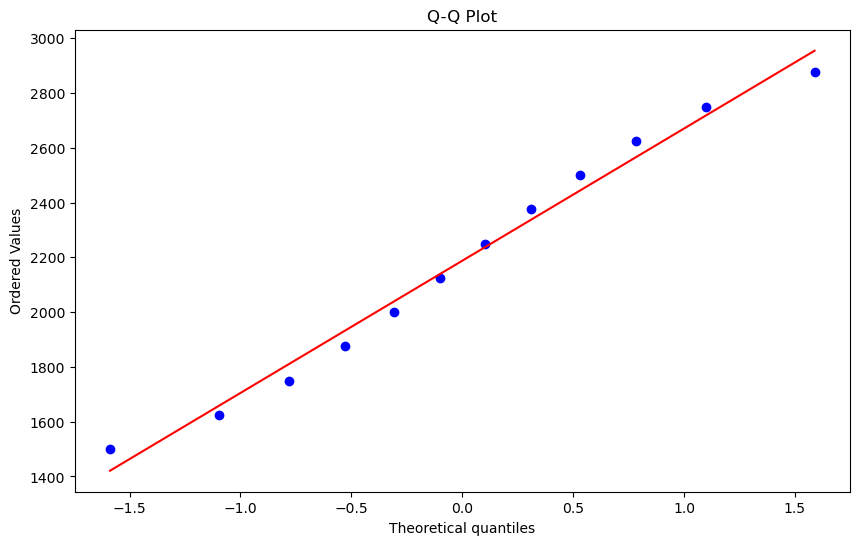

In [10]:
# Histograma
plt.figure(figsize=(10,6))
sns.histplot(data=dados, kde=True)
plt.title('Histograma dos Dados')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

# Q-Q plot
plt.figure(figsize=(10,6))
stats.probplot(dados, plot=plt)
plt.title('Q-Q Plot')
plt.show()

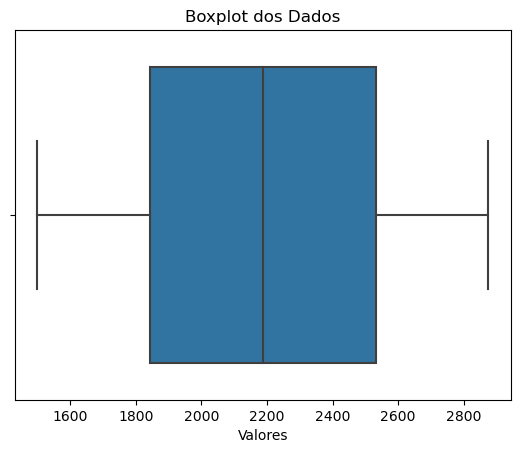

In [12]:
#Grafico de Boxplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seus dados já estão em um DataFrame chamado df
# e a coluna com os valores é 'valores'

# Criando o boxplot
sns.boxplot(data=df, x='valores')
plt.title('Boxplot dos Dados')
plt.xlabel('Valores')
plt.show()

In [13]:
#Grafico de Pareto
# 1. Importando as bibliotecas:


import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#2. Criando um DataFrame:

# Substitua 'seu_arquivo.xlsx' pelo nome do seu arquivo
df = pd.read_excel('multa por produto.xlsx')

# Renomeando as colunas (opcional)
df.columns = ['PRODUTO', 'VALOR']

In [23]:
#3. Agrupando os dados e calculando os totais:


# Agrupando por produto e somando as multas
df_agrupado = df.groupby('PRODUTO')['VALOR'].sum().reset_index()

# Calculando o percentual de cada produto em relação ao total
df_agrupado['Percentual'] = df_agrupado['VALOR'] / df_agrupado['VALOR'].sum() * 100

# Calculando o percentual acumulado
df_agrupado['Acumulado'] = df_agrupado['Percentual'].cumsum()

      PRODUTO   VALOR  Percentual   Acumulado
1  CONSIGNADO  388917   45.000052   45.000052
0      CARTAO  328418   37.999951   83.000003
3     SEGUROS   86426   10.000012   93.000015
4     TARIFAS   43213    5.000006   98.000021
2      OUTROS   17285    1.999979  100.000000


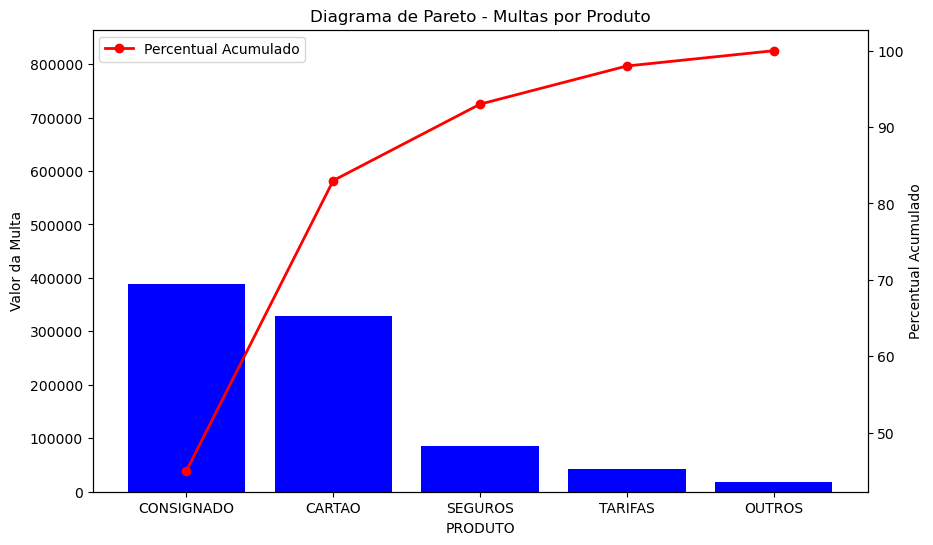

In [43]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculando o percentual acumulado corretamente
df_agrupado['Acumulado'] = df_agrupado['Percentual'].cumsum()


# Criando o gráfico
plt.figure(figsize=(10, 6))

# Criando o eixo primário (valores das multas)
ax1 = plt.subplot()
ax1.bar(df_agrupado['PRODUTO'], df_agrupado['VALOR'], color='blue', label='Valor da Multa')
ax1.set_xlabel('PRODUTO')
ax1.set_ylabel('Valor da Multa')
ax1.set_ylim(0, df_agrupado['VALOR'].sum())  # Ajustando o limite do eixo y


# Criando o eixo secundário (percentuais)
ax2 = ax1.twinx()
ax2.plot(df_agrupado['PRODUTO'], df_agrupado['Acumulado'], color='red', label='Percentual Acumulado', linewidth=2, marker='o')
ax2.set_ylabel('Percentual Acumulado')


# Personalizando o gráfico
plt.title('Diagrama de Pareto - Multas por Produto')
plt.xticks(rotation=45)
plt.legend()  # Adicionando a legenda

# Mostrando a tabela com os resultados
print(df_agrupado)

plt.show()